# MobileNet

## Import Coco Dataset

In [2]:
import torchvision.datasets as dset
import torchvision
import torch
import json

In [3]:
path2data="../data/train2017/train2017"
path2json="../data/annotations_trainval2017/annotations/instances_train2017.json"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cuda


In [4]:
import torchvision.transforms as T

coco_train = dset.CocoDetection(root = path2data,
                                annFile = path2json,
                                transform=T.Compose([
                                    T.ToTensor()
                                ]))


loading annotations into memory...
Done (t=17.13s)
creating index...
index created!


In [54]:
print('Number of samples: ', len(coco_train))

Number of samples:  118287


In [136]:
for i in coco_train[47][1]:
    print(i['category_id'])

1
50
78
48
49
49
50
50
50
50
50
49
49
49
85
50
50
50
50
50


In [4]:
print(coco_train[47][1][0])

{'segmentation': [[27.7, 423.27, 27.7, 372.64, 29.61, 346.85, 30.57, 264.7, 48.72, 205.47, 59.23, 183.5, 106.03, 154.84, 101.26, 125.23, 104.12, 115.68, 108.9, 87.98, 116.54, 72.69, 153.8, 69.83, 173.86, 83.2, 185.32, 100.39, 183.41, 120.45, 185.32, 145.29, 166.21, 177.77, 164.3, 197.83, 208.25, 231.26, 220.66, 248.46, 280.85, 199.74, 264.61, 176.81, 270.34, 169.17, 301.86, 140.52, 310.46, 151.02, 308.55, 186.37, 297.09, 216.94, 271.29, 272.34, 248.37, 299.09, 223.53, 301.95, 236.9, 325.84, 324.79, 323.92, 353.45, 317.24, 361.09, 305.77, 392.61, 318.19, 388.79, 330.61, 364.91, 348.76, 305.68, 351.63, 228.31, 366.91, 233.08, 426.14, 28.66, 427.0]], 'area': 64624.86664999999, 'iscrowd': 0, 'image_id': 294, 'bbox': [27.7, 69.83, 364.91, 357.17], 'category_id': 1, 'id': 470246}


In [103]:
with open(path2json) as json_file:
    data = json.load(json_file)
    for p in data['categories']:
        print("'" + p['name'] + "'" + ', ', end='')
        print(p['id'])
        print('')

'person', 1

'bicycle', 2

'car', 3

'motorcycle', 4

'airplane', 5

'bus', 6

'train', 7

'truck', 8

'boat', 9

'traffic light', 10

'fire hydrant', 11

'stop sign', 13

'parking meter', 14

'bench', 15

'bird', 16

'cat', 17

'dog', 18

'horse', 19

'sheep', 20

'cow', 21

'elephant', 22

'bear', 23

'zebra', 24

'giraffe', 25

'backpack', 27

'umbrella', 28

'handbag', 31

'tie', 32

'suitcase', 33

'frisbee', 34

'skis', 35

'snowboard', 36

'sports ball', 37

'kite', 38

'baseball bat', 39

'baseball glove', 40

'skateboard', 41

'surfboard', 42

'tennis racket', 43

'bottle', 44

'wine glass', 46

'cup', 47

'fork', 48

'knife', 49

'spoon', 50

'bowl', 51

'banana', 52

'apple', 53

'sandwich', 54

'orange', 55

'broccoli', 56

'carrot', 57

'hot dog', 58

'pizza', 59

'donut', 60

'cake', 61

'chair', 62

'couch', 63

'potted plant', 64

'bed', 65

'dining table', 67

'toilet', 70

'tv', 72

'laptop', 73

'mouse', 74

'remote', 75

'keyboard', 76

'cell phone', 77

'microwave'

In [8]:
labels = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 
'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 
'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 
'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 
'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 
'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 
'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 
'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', ]

Populating the interactive namespace from numpy and matplotlib


TypeError: Invalid shape (3, 427, 640) for image data

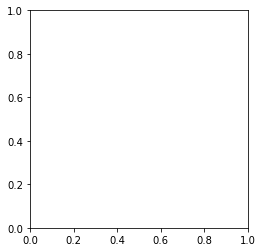

In [5]:
%pylab inline
from matplotlib import pyplot as plt

plt.imshow(coco_train[47][0], interpolation='nearest')
plt.show()
print(labels[4-1])


## RPN and RoI Pooling

In [5]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

fasterrcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)
num_classes = 1
in_features = fasterrcnn.roi_heads.box_predictor.cls_score.in_features
fasterrcnn.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

fasterrcnn = fasterrcnn.cuda()

In [11]:
from torch.utils.data.sampler import SubsetRandomSampler

def collate_fn_coco(batch):
    return tuple(zip(*batch))

data_loader = torch.utils.data.DataLoader(
        coco_train, batch_size=4, num_workers=0,
        collate_fn=collate_fn_coco,
        sampler=SubsetRandomSampler([0, 1, 2, 3, 4]))

import numpy as np
import matplotlib.pyplot as plt
from itertools import islice

for images, labels in data_loader:
    print(output = fasterrcnn(images,labels))


TypeError: list indices must be integers or slices, not str

## MobileNet implementation